<a href="https://colab.research.google.com/github/Shoaib26-1994/California-House-Price-prediction/blob/main/California_House_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# California (U.S.A) House Price Prediction Model

Importing Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Set Loading

In [2]:
from sklearn.datasets import fetch_california_housing
house_price_dataset = fetch_california_housing()

Data Set View

In [3]:
house_price_dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

Type of data set

In [4]:
type(house_price_dataset)

sklearn.utils._bunch.Bunch

Keys in data set

In [5]:
house_price_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

Description of Data set

In [6]:
print(house_price_dataset['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [7]:
print(house_price_dataset['target_names'])

['MedHouseVal']


# Converting Bunch Data Set to Pandas DataFrame

In [8]:
house_price_df = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)

In [9]:
house_price_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


# Target of Data set

In [10]:
house_price_df['price_of_house'] = house_price_dataset.target

In [11]:
house_price_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price_of_house
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [12]:
# house_price_dataset_df = pd.DataFrame(data = np.c_[house_price_dataset['data'],house_price_dataset['target']],
                                      #columns = np.append(house_price_dataset['feature_names'], ['Price']))

#  View Our Data Set

In [13]:
house_price_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price_of_house
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Creating a copy of Data set

In [14]:
hsp_df = house_price_df.copy()

# Information About Our Data Set

In [15]:
hsp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MedInc          20640 non-null  float64
 1   HouseAge        20640 non-null  float64
 2   AveRooms        20640 non-null  float64
 3   AveBedrms       20640 non-null  float64
 4   Population      20640 non-null  float64
 5   AveOccup        20640 non-null  float64
 6   Latitude        20640 non-null  float64
 7   Longitude       20640 non-null  float64
 8   price_of_house  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


# Cheching Null Values

In [16]:
hsp_df.isnull().sum()

MedInc            0
HouseAge          0
AveRooms          0
AveBedrms         0
Population        0
AveOccup          0
Latitude          0
Longitude         0
price_of_house    0
dtype: int64

# Checking Duplicated Values

In [17]:
hsp_df.duplicated().sum()

0

# Data Set Numarical Features Description

In [18]:
hsp_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price_of_house
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# Correlation in Data Set Feature

In [19]:
hsp_df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price_of_house
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
price_of_house,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


Understanding the correlation between various features in the dataset

1. Positive Correlation

2. Negative Correlation

# Creating Heatmap For Corelation

<Axes: >

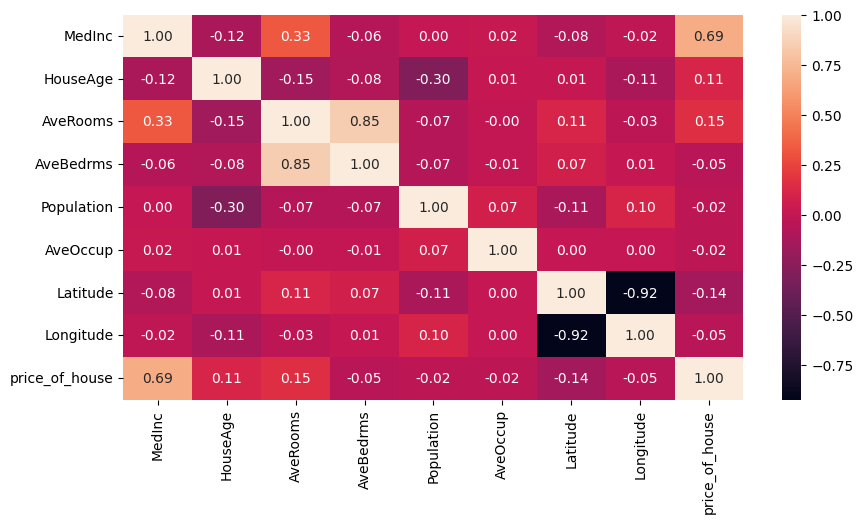

In [20]:
plt.figure(figsize = (10,5))
sns.heatmap(hsp_df.corr(), annot= True, fmt = '.2f')

In [21]:
'''Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude'''

'Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude'

#Splitting the Data and Target

# Dependent and Independent Varaibels

In [22]:
X = hsp_df.drop(['price_of_house'], axis = 1)

In [23]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [24]:
Y = hsp_df['price_of_house']

In [25]:
Y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: price_of_house, dtype: float64

# Splitting the Data into Training data and Test data

In [26]:
from sklearn.model_selection import  train_test_split

In [27]:
x_train,x_test,y_train,y_test = train_test_split(X,Y ,test_size = 0.2, random_state = 2)

In [28]:
x_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
2072,1.4817,6.0,4.443645,1.134293,1397.0,3.350120,36.77,-119.84
10600,6.9133,8.0,5.976471,1.026471,862.0,2.535294,33.68,-117.80
2494,1.5536,25.0,4.088785,1.000000,931.0,4.350467,36.60,-120.19
4284,1.5284,31.0,2.740088,1.008811,597.0,2.629956,34.10,-118.32
16541,4.0815,21.0,5.166667,1.002688,1130.0,3.037634,37.79,-121.23


In [29]:
x_test.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
10385,6.4114,15.0,7.527559,1.049869,2529.0,3.318898,33.60,-117.65
1943,4.1843,12.0,6.330084,1.041783,2033.0,2.831476,38.62,-120.91
7490,1.7411,35.0,5.369159,1.294393,909.0,4.247664,33.93,-118.23
16889,3.4412,39.0,4.173405,1.074573,2156.0,1.937107,37.59,-122.37
11416,7.8195,16.0,8.602349,1.058725,2142.0,3.593960,33.70,-117.98


In [30]:
y_train.head()

2072     0.720
10600    2.741
2494     0.583
4284     2.000
16541    1.179
Name: price_of_house, dtype: float64

In [31]:
y_test.head()

10385    2.787
1943     2.076
7490     0.967
16889    3.538
11416    3.905
Name: price_of_house, dtype: float64

In [32]:
print(X.shape, x_train.shape, x_test.shape)

(20640, 8) (16512, 8) (4128, 8)


# Model Training

# XGBRegressor

In [33]:
from xgboost import XGBRegressor

In [34]:
model_01 = XGBRegressor()

In [35]:
model_01.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

# Model Evaluation

Prediction on training data

In [36]:
# training data
traning_pred_model_01 = model_01.predict(x_train)


In [37]:
from sklearn.metrics import r2_score , mean_absolute_error

In [38]:
r2_sc = r2_score(y_train,traning_pred_model_01)

In [39]:
mae_ = mean_absolute_error(y_train,traning_pred_model_01)

In [40]:
print('R2 Score for trainig data =',r2_sc , 'mean_absolute_error for trainig data =',mae_)

R2 Score for trainig data = 0.9451221492760822 mean_absolute_error for trainig data = 0.1919170860794262


# Visualizing the actual Prices and predicted prices on training Data

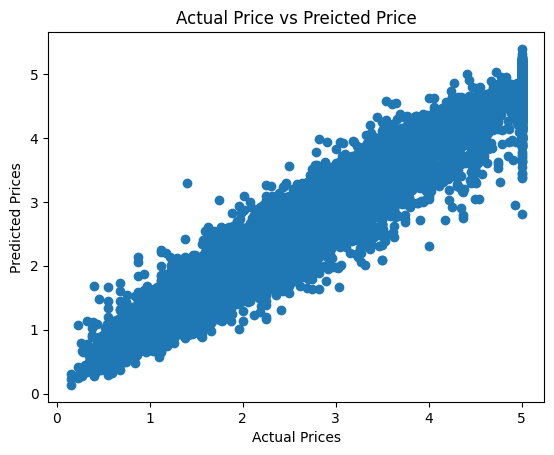

In [41]:
plt.scatter(y_train, traning_pred_model_01)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

Prediction on test data

In [42]:
# test data

In [43]:
test_pred_model_01 = model_01.predict(x_test)

In [44]:
r2_sc_tst = r2_score(y_test,test_pred_model_01)

In [45]:
mae_tst = mean_absolute_error(y_test,test_pred_model_01)

In [46]:
print('R2 Score for trainig data =',r2_sc_tst )
print('mean_absolute_error for trainig data =',mae_tst)

R2 Score for trainig data = 0.8412904408180302
mean_absolute_error for trainig data = 0.30753655785801337


# Visualizing the actual Prices and predicted prices on test Data

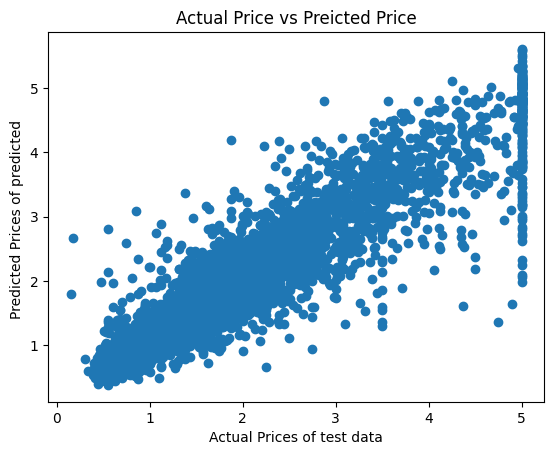

In [47]:
plt.scatter(y_test, test_pred_model_01)
plt.xlabel("Actual Prices of test data")
plt.ylabel("Predicted Prices of predicted ")
plt.title("Actual Price vs Preicted Price")
plt.show()

# Model Testing By Giving Data Set

In [48]:
# Input Given = (2.5568, 18.0, 6.114035,	1.315789, 356.0,	3.122807, 39.49, -121.21)
# Output will be = 0.771

In [49]:
import numpy as np

# Get input from user
input_data = input('Enter the details: ')

# Split the input data string into individual values
input_values = [float(value.strip()) for value in input_data.split(',')]

# Convert the input values to a numpy array
data_as_array = np.array(input_values).reshape(1, -1)

# Make a prediction using the model
prediction = model_01.predict(data_as_array)

print('Price of the house will be =',prediction)

Enter the details: 2.5568, 18.0, 6.114035,	1.315789, 356.0,	3.122807, 39.49, -121.21
Price of the house will be = [0.7863389]


# After  trail and tested many values we get that  our model is predecting value nearrest to the output

# Hence we can say that our model is train (Not fully train thre might be some error but currently its showing its best result